In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
!unzip "/content/drive/MyDrive/Ara Proje/datalar/ara_proje_data.zip" -d "/content/datalar"

Archive:  /content/drive/MyDrive/Ara Proje/datalar/ara_proje_data.zip
replace /content/datalar/train/benign/benign (33).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
!ls /content/

datalar  drive	sample_data


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# --- 1. YENİ PARAMETRELER ---
DATA_ROOT = "/content/datalar/" # Olası kök dizin
IMAGE_SIZE = (224, 224)
NEW_LEARNING_RATE = 0.001
MAX_EPOCHS = 50
PATIENCE = 10
BATCH_SIZE = 32

# --- 2. CALLBACK'LERİN TANIMLANMASI ---

# 5 epoch boyunca val_loss iyileşmezse eğitimi durdur ve en iyi ağırlıkları geri yükle
early_stopping = EarlyStopping(
monitor='val_loss',
patience=PATIENCE,# Sabır değeri
restore_best_weights=True,# En iyi ağırlıkları yükle
verbose=1
)

# Her epoch sonunda en iyi val_loss değerine sahip ağırlıkları kaydet
checkpoint_filepath = '/tmp/Xception_best_weights_lr0001.weights.h5'
model_checkpoint = ModelCheckpoint(
filepath=checkpoint_filepath,
monitor='val_loss',
save_best_only=True,
verbose=1
)

# --- 3. VERİ YÜKLEYİCİLERİ (DOĞRU NORMALİZASYON) ---
datagen_rescale = ImageDataGenerator(rescale=1./255) # 0-1 Normalizasyonu

train_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'valid', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Feature Extraction) ---


base_model = Xception(weights='imagenet',
                      include_top=False,
                      pooling='avg',
                      input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))



base_model.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. MODELİ DERLEME VE EĞİTİM ---
print(f"Xception modeli LR={NEW_LEARNING_RATE} ile derleniyor...")

model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
loss='categorical_crossentropy',
metrics=['accuracy'])

print(f"\n--- ResNet Eğitimi Başlıyor (LR: {NEW_LEARNING_RATE}, Max Epoch: {MAX_EPOCHS}) ---\n")

history = model.fit(
train_generator,
epochs=MAX_EPOCHS,
validation_data=valid_generator,
callbacks=[early_stopping, model_checkpoint] # Callbacks eklendi
)


# --- 6. MODELİ KAYDETME ---
# Kayıt dizinini tanımlıyoruz
save_path = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/xception_model_with_BUSI.keras"

# Modeli .keras formatında kaydediyoruz
model.save(save_path)

print(f"\n✅ Xception Temel Modeli Başarıyla Kaydedildi: {save_path}")

Found 7031 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Xception modeli LR=0.001 ile derleniyor...

--- ResNet Eğitimi Başlıyor (LR: 0.001, Max Epoch: 50) ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5539 - loss: 0.9223
Epoch 1: val_loss improved from inf to 0.70371, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 100s 327ms/step - accuracy: 0.5542 - loss: 0.9218 - val_accuracy: 0.6667 - val_loss: 0.7037
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7195 - loss: 0.6759
Epoch 2: val_loss improved from 0.70371 to 0.65215, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7195 - loss: 0.6759 - val_accuracy: 0.6667 - val_loss: 0.6521
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7364 - loss: 0.6408
Epoch 3: val_loss improved from 0.65215 to 0.64581, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7365 - loss: 0.6408 - val_accuracy: 0.7000 - val_loss: 0.6458
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7653 - loss: 0.5982
Epoch 4: val_loss improved from 0.64581 to 0.60742, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7653 - loss: 0.5982 - val_accuracy: 0.7250 - val_loss: 0.6074
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7727 - loss: 0.5722
Epoch 5: val_loss did not improve from 0.60742
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7726 - loss: 0.5722 - val_accuracy: 0.7083 - val_loss: 0.6084
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7657 - loss: 0.5635
Epoch 6: val_loss improved from 0.60742 to 0.59544, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7657 - loss: 0.5635 - val_accuracy: 0.7250 - val_loss: 0.5954
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7683 - loss: 0.5525
Epoch 7: val_loss did not improve from 0.59544
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7683 - loss: 0.5525 - val_accuracy: 0.6833 - val_loss: 0.6292
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7879 - loss: 0.5466
Epoch 8: val_loss did not improve from 0.59544
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7878 - loss: 0.5466 - val_accuracy: 0.7083 - val_loss: 0.6108
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7792 - loss: 0.5286
Epoch 9: val_loss improved from 0.59544 to 0.56832, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7792 - loss: 0.5286 - val_accuracy: 0.7417 - val_loss: 0.5683
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7874 - loss: 0.5343
Epoch 10: val_loss did not improve from 0.56832
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7874 - loss: 0.5343 - val_accuracy: 0.7250 - val_loss: 0.5980
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7890 - loss: 0.5190
Epoch 11: val_loss did not improve from 0.56832
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7890 - loss: 0.5191 - val_accuracy: 0.7417 - val_loss: 0.5764
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7753 - loss: 0.5449
Epoch 12: val_loss did not improve from 0.56832
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7753 - loss: 0.5448 - val_accuracy: 0.7333 - val_loss: 0.5895
Epoch 13/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7871 - loss: 0.5094
Epoch 13: val_loss did not i

220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8030 - loss: 0.4810 - val_accuracy: 0.7500 - val_loss: 0.5617
Epoch 20/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7945 - loss: 0.5004
Epoch 20: val_loss did not improve from 0.56172
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7945 - loss: 0.5004 - val_accuracy: 0.7250 - val_loss: 0.5772
Epoch 21/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8035 - loss: 0.4865
Epoch 21: val_loss did not improve from 0.56172
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.8034 - loss: 0.4865 - val_accuracy: 0.7333 - val_loss: 0.6144
Epoch 22/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7941 - loss: 0.4995
Epoch 22: val_loss did not improve from 0.56172
220/220 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.7941 - loss: 0.4995 - val_accuracy: 0.7500 - val_loss: 0.5903
Epoch 23/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8011 - loss: 0.4765
Epoch 23: val_loss did not i

In [16]:
# Eğitimin temel metriklerini yazdıralım
print("\n--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---")

# En iyi Validasyon Accuracy'i bulma
best_val_acc = max(history.history['val_accuracy'])
print(f"En Yüksek Validasyon Accuracy: {best_val_acc:.4f}")

# Sonuçları Training Seti üzerinde değerlendirelim
# Training Seti performansı (genellikle çok yüksektir)
train_results = model.evaluate(train_generator, verbose=0)
print(f"Training Seti Accuracy: {train_results[1]:.4f}")
print(f"Training Seti Loss: {train_results[0]:.4f}")


--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---
En Yüksek Validasyon Accuracy: 0.7750
Training Seti Accuracy: 0.8606
Training Seti Loss: 0.3962


Found 115 images belonging to 3 classes.

--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 8s/step
Test Accuracy: 0.8087
Test Recall (Duyarlılık): 0.8049
Test Precision (Kesinlik): 0.7872
Test F1-Score: 0.7951


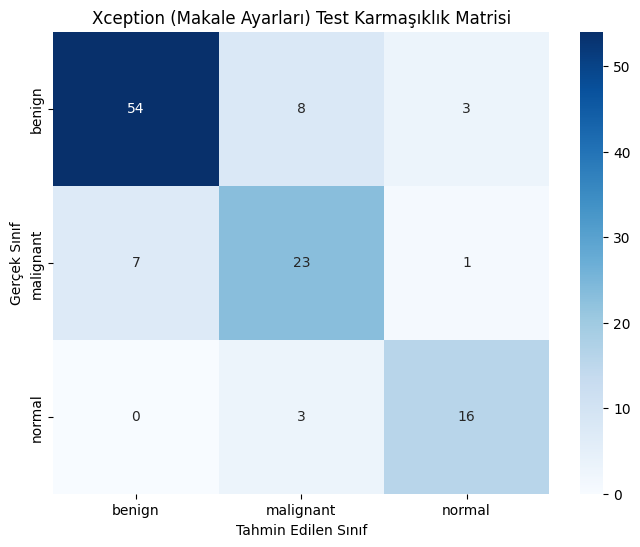


--- Tabloya Eklenecek Sonuçlar ---

Xception (Makale Ayarları) | Accuracy: 0.8087 | Recall: 0.8049 | Precision: 0.7872 | F1-Score: 0.7951

Karmaşıklık Matrisi (Xception_makale_confusion_matrix.png) oluşturuldu.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
# Makale ayarlarına uygun olarak 0-1 normalizasyonunu kullanmalıyız.
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Xception (Makale Ayarları) Test Karmaşıklık Matrisi')
plt.savefig('resnet_makale_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"Xception (Makale Ayarları) | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (Xception_makale_confusion_matrix.png) oluşturuldu.")